# Assignment 3: Making a Pie Chart
**Author:** Marcella Morgan

In this assignment, I worked with a dataset to create a pie chart showing the distribution of email domains. The goal was to make it clear and visually appealing.


In [3]:
# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I spent most of my time on this assignment messing around with the headers and index. When I first tried to import the dataset pandas was shifting "Index" to the row under the other header names, making a kind of two-row header. The dataset worked and I was able to make a pie chart but "Index" being on the second row was annoying so I tried to fix it. 

I experimented with different combinations of header and index_col:

- Using header=0, index_col=0 caused "Index" to shift a row below other header titles.
- Leaving both out added a new index column, but the dataset already had an index, so I ended up with two rows acting like indexes.
- Trying header=None brought everything in as raw data but gave me two index rows and two header rows, which didn’t help either.
- Trying skipping the first row (skiprows=1) and creating new headers - that had to be typed out, which felt overly complicated and annoying and didn’t even work!

After doing a bit of googling, the best solution I came up with was that the "second row issue" wasn’t actually a problem with the index—it was just cosmetic. Removing the name of the index column with: df.index.name = None fixed how it looked. But honestly, I’m not sure this is the best solution. Keeping the "Index" header might actually be clearer because it shows that column is the index. It’s probably better to leave it there unless the presentation really needs to look a certain way.

I still don't understand why pandas wanted to keep the index column title on another line but I have a feeling I'll be encountering the problem again. All this was frustrating but I'm realising that working with datasets requires a lot of this kind of figuring out. It's the simple stuff you spend hours on.

In [4]:
# Reading in files with pandas
url = 'https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download'
df = pd.read_csv(url, header=0, index_col=0)
df.index.name=None
df

,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer
...,...,...,...,...,...,...,...,...
996,fedF4c7Fd9e7cFa,Kurt,Bryant,Female,lyonsdaisy@example.net,021.775.2933,1959-01-05,Personnel officer
997,ECddaFEDdEc4FAB,Donna,Barry,Female,dariusbryan@example.com,001-149-710-7799x721,2001-10-06,Education administrator
998,2adde51d8B8979E,Cathy,Mckinney,Female,georgechan@example.org,+1-750-774-4128x33265,1918-05-13,Commercial/residential surveyor
999,Fb2FE369D1E171A,Jermaine,Phelps,Male,wanda04@example.net,(915)292-2254,1971-08-31,Ambulance person


After loading the dataset, I extracted the email domains from the "Email" column by splitting the addresses at the @ symbol and keeping the part after it using .str[1] I then counted how many times each domain appeared with value_counts. To visualize this, I created a pie chart to show the proportions of each domain in the dataset.

To make it look nicer, I added enhancements like customized colors, labels, and a shadow effect. I also exploded the largest category to emphasize its significance, which helps highlight the domain with the most entries. 

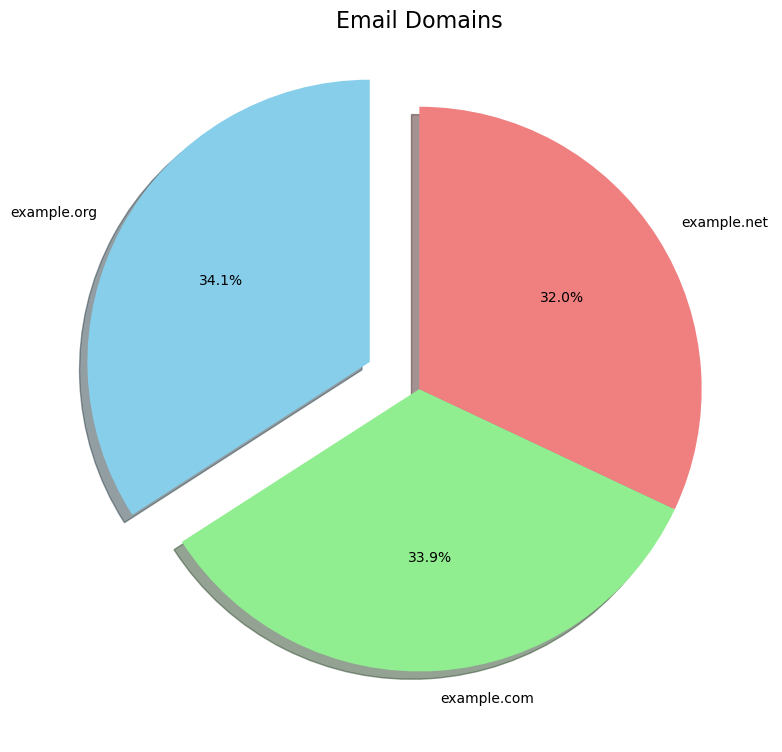

In [ ]:
# Extract email domains
email_domain = df['Email'].str.split('@').str[1]

# Calculate value counts
counts = email_domain.value_counts()

# Plot value counts as pie chart
fig, ax = plt.subplots(figsize=(8, 8))
counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'lightgreen', 'lightcoral'],
    explode=[0.1 if count == counts.max() else 0 for count in counts],  # Emphasize the largest slice
    shadow=True,
    startangle=90  # Start from the top
)

# Customize the chart
ax.set_title('Email Domains', fontsize=16)
ax.set_ylabel('')
plt.tight_layout()
plt.show()


# https://www.geeksforgeeks.org/how-to-plot-value-counts-in-pandas/
# https://www.boardinfinity.com/blog/learn-about-reset-index-pandas/